# Lab 5
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/marts-dev/geog510-test/blob/main/lab5.ipynb)


## Exercise 1: Calculating Distances with Functions
- Define a function `calculate_distance` that takes two geographic coordinates (latitude and longitude) and returns the distance between them using the Haversine formula.
- Use this function to calculate the distance between multiplke pair of coordinates.

In [31]:
def calculate_distance(pointA, pointB):
  # Calculate the distance between two points on the earth
  # The latitude and longitude are in degrees
  # The return value is in kilometers
  # The formula is based on the Haversine formula
  # https://en.wikipedia.org/wiki/Haversine_formula
  # The radius of the earth is 6371 km
  import math
  lat1, lat2, lon1, lon2 = map(math.radians, [pointA[0], pointB[0], pointA[1], pointB[1]])

  delta_latitude = lat2 - lat1
  delta_longitude = lon2 - lon1

  a = math.sin(delta_latitude/2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(delta_longitude/2) ** 2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
  earth_radius = 6371
  distance = earth_radius * c

  return distance


calculate_distance((41.507483, -99.436554), (38.504048, -98.315949))

347.32834803942626

## Exercise 2: Batch Distance Calculation
- Create a function `batch_distance_calculation` that accepts a list of coordinate pairs and returns a list of distances between consecutive pairs.
- Test the function with a list of coordinates representing several cities.

In [4]:
def batch_distance_calculator(coords):
  # Calculate the distance between a list of coordinates
  # The input is a list of coordinates
  # The return value is a list of lists of distances
  distances = []
  for coord_pair in coords:
    distance = calculate_distance(coord_pair[0], coord_pair[1])
    distances.append(distance)

  return distances

batch_distance_calculator([[(41.507483, -99.436554), (38.504048, -98.315949)], [(41.507483, -99.436554), (38.504048, -98.315949)]])

[347.32834803942626, 347.32834803942626]

## Exercise 3: Creating and Using a Point Class
- Define a `Point` class to represent a geographic point with attributes `latitude`, `longitude`, and `name`.
- Add a method `distance_to` that calculates the distance from one point to another.
- Instantiate several `Point` objects and calculate the distance between them.

In [26]:
class Point:
  def __init__(self, lat, lon, name):
    self.latitude = lat
    self.longitude = lon
    self.name = name

  def __str__(self):
    return f"{self.name or 'Point'} ({self.latitude}, {self.longitude})"

  def distance_to(self, other):
    return calculate_distance((self.latitude, self.longitude), (other.latitude, other.longitude))
  
p1 = Point(41.507483, -99.436554, "Lincoln, NE")
p2 = Point(38.504048, -98.315949, "Hays, KS")

p1.distance_to(p2)

347.32834803942626

## Exercise 4: Reading and Writing Files

- Write a function `read_coordinates` that reads a file containing a list of coordinates (latitude, longitude) and returns them as a list of tuples.
- Write another function `write_coordinates` that takes a list of coordinates and writes them to a new file.
- Ensure that both functions handle exceptions, such as missing files or improperly formatted data.

In [21]:
def read_coordinates(file_name):
  # Read a file with coordinates
  # The file should have one coordinate per line
  # The coordinates should be in the format "latitude, longitude"
  # The return value is a list of coordinates
  coords = []
  try:
    with open(file_name, "r") as file:
      for line in file.readlines():
        lat, lon = line.strip().split(",")
        coords.append((float(lat), float(lon)))
  except FileNotFoundError:
    print(f"File {file_name} not found")
  except Exception as e:
    print(f"An unexpected error occurred while processing the file: {e}")
  finally:
    print(f"Finished processing {file_name}")

  return coords

def write_coordinates(file_name, coords):
  # Write a list of coordinates to a file
  # The coordinates should be in the format "latitude, longitude"
  try:
    with open(file_name, "w") as file:
      for coord in coords:
        file.write(f"{coord[0]}, {coord[1]}\n")
  except FileNotFoundError:
    print(f"File {file_name} not found")
  except Exception as e:
    print(f"An unexpected error occurred while processing the file: {e}")
  finally:
    print(f"Finished processing {file_name}")

## Exercise 5: Processing Coordinates from a File

- Create a function that reads coordinates from a file and uses the `Point` class to create `Point` objects.
- Calculate the distance between each consecutive pair of points and write the results to a new file.
- Ensure the function handles file-related exceptions and gracefully handles improperly formatted lines.

In [14]:
# Create a sample coordinates.txt file
sample_data = """41.507483, -99.436554
38.504048, -98.315949
35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

output_file = "coordinates.txt"

try:
    with open(output_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{output_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")

Sample file 'coordinates.txt' has been created successfully.


In [29]:
def process_coordinates(input_file, output_file):
  try:
    with open(output_file, "w") as file:
      # Read coordinates from an input file
      coords = read_coordinates(input_file)
      # Create Points from the coordinates
      prev = None # Store temp point
      for coord in coords:
        p = Point(coord[0], coord[1], "")
        if prev is not None:
          distance = prev.distance_to(p)
          print(f"The distance between Previous and Current point is {distance:.4f} km")
          file.write(f"{distance}\n")
        prev = p
  except FileNotFoundError:
    print(f"File {output_file} not found")
  except Exception as e:
    print(f"An unexpected error occurred while processing the file: {e}")
  finally:
    print(f"Finished creating {output_file}")

process_coordinates("coordinates.txt", "distances.txt")

Finished processing coordinates.txt
The distance between Previous and Current point is 347.3283 km
The distance between Previous and Current point is 9838.9310 km
The distance between Previous and Current point is 8815.4734 km
The distance between Previous and Current point is 8755.6023 km
The distance between Previous and Current point is 16993.9335 km
The distance between Previous and Current point is 16960.4974 km
Finished creating distances.txt


## Exercise 6: Exception Handling in Data Processing

- Modify the `batch_distance_calculation` function to handle exceptions that might occur during the calculation, such as invalid coordinates.
- Ensure the function skips invalid data and continues processing the remaining data.

In [32]:
def batch_distance_calculator(coords):
  def valid_coordinates(lat, lon):
    if lat > 90. or lat < -90. or lon > 180. or lon < -180.:
      return False
    return True
  # Calculate the distance between a list of coordinates
  # The input is a list of coordinates
  # The return value is a list of lists of distances
  distances = []
  for coord_pair in coords:
    lat1, lon1 = coord_pair[0][0], coord_pair[0][1]
    lat2, lon2 = coord_pair[1][0], coord_pair[1][1]
    if not valid_coordinates(lat1, lon1) or not valid_coordinates(lat2, lon2):
      print(f"Invalid coordinates: {coord_pair}")
      continue
    distance = calculate_distance((lat1, lon1), (lat2, lon2))
    distances.append(distance)

  return distances

batch_distance_calculator([[(41.507483, -99.436554), (38.504048, -98.315949)], [(41.507483, -99.436554), (38.504048, -98.315949)], [(141.507483, -99.436554), (38.504048, -98.315949)]])

Invalid coordinates: [(141.507483, -99.436554), (38.504048, -98.315949)]


[347.32834803942626, 347.32834803942626]

## Exercise 7: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [35]:
import numpy as np

coordinates = np.array([
  [35.6895, 139.6917], # Tokyo
  [40.7128, -74.0060], # New York
  [51.5074, -0.1278], # London
  [48.8566, 2.3522] # Paris
])

radians_coordinates = np.radians(corrdinates)
tokyo_diffs = radians_coordinates - radians_coordinates[0]
print(coordinates)
print(radians_coordinates)
print(tokyo_diffs)

[[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]
 [ 4.885660e+01  2.352200e+00]]
[[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]
[[ 0.          0.        ]
 [ 0.08767312 -3.72972847]
 [ 0.27607444 -2.44031063]
 [ 0.22980925 -2.39702647]]


## Exercise 8: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [37]:
import pandas as pd

df = pd.read_csv("https://github.com/opengeos/datasets/releases/download/world/world_cities.csv")
print("Head of the dataframe")
print(df.head())
print("Check for missing values")
print(df.isna().sum())
print("Countries with population greater than 1 million")
print(df[df["population"] > 1_000_000])
country_population = df.groupby("country").agg({"population": "sum"})
print(country_population.sort_values("population", ascending=False).head(10))

Head of the dataframe
   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062
Check for missing values
id            0
name          0
country       0
latitude      0
longitude     0
population    0
dtype: int64
Countries with population greater than 1 million
        id            name country  latitude  longitude  population
97      98           Turin     ITA  45.07039    7.66996     1652000
103    104           Lille     FRA  50.64997    3.08001     1044000
123    124  San Bernardino     USA  34.12038 -117.30003     1745000
124    125      Bridgeport     USA  41.17998  -73.19996     1018000
126    127      Manchester     GBR  53.50042   -2.24799     2230000
...    ...             ... 

## Exercise 9: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

Head of the dataframe
   fid  height_MS  height_FM  height_avg  SQMETERS STATEFP      NAME  \
0    2      15.05      23.30       19.18   6365.72      36  New York   
1    4      23.62      46.18       34.90   3287.84      36  New York   
2    5      19.98     109.60       64.79   2011.21      36  New York   
3    9      18.50      18.18       18.34   3110.32      36  New York   
4   34      21.53      32.84       27.18   5240.89      36  New York   

                                            geometry  
0  POLYGON ((-74.00129 40.71992, -74.00061 40.719...  
1  POLYGON ((-74.00320 40.71654, -74.00265 40.716...  
2  POLYGON ((-74.01415 40.70324, -74.01342 40.703...  
3  POLYGON ((-73.98974 40.71924, -73.98924 40.720...  
4  POLYGON ((-74.00941 40.72351, -74.00816 40.723...  


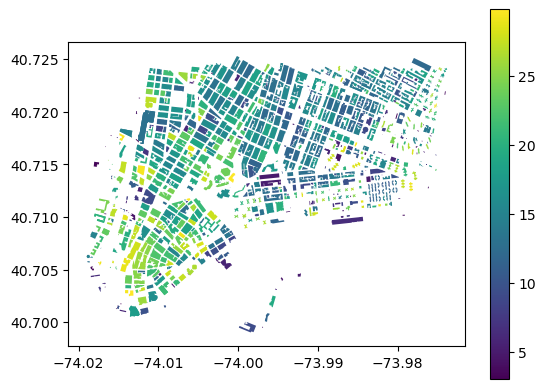

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt

file_name = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(file_name)
print("Head of the dataframe")
print(gdf.head())
#Create a plot of the building footprints and color them based on the building height (use the `height_MS` column)
gdf.plot(column="height_MS", legend=True)
plt.show()

In [40]:
gdf.explore("height_MS", legend=True)

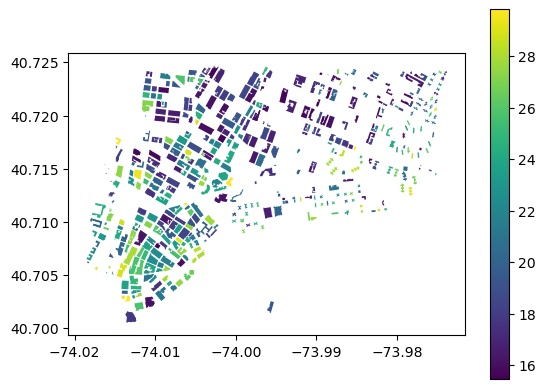

Dataframe saved to above_mean.geojson


In [41]:
mean_height = gdf["height_MS"].mean()
above_mean = gdf[gdf["height_MS"] > mean_height]
above_mean.plot(column="height_MS", legend=True)
plt.show()

above_mean.to_file("above_mean.geojson", driver="GeoJSON")
print("Dataframe saved to above_mean.geojson")

## Exercise 10: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

C:\Users\ghost\AppData\Local\Temp\ipykernel_16636\3925912953.py:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

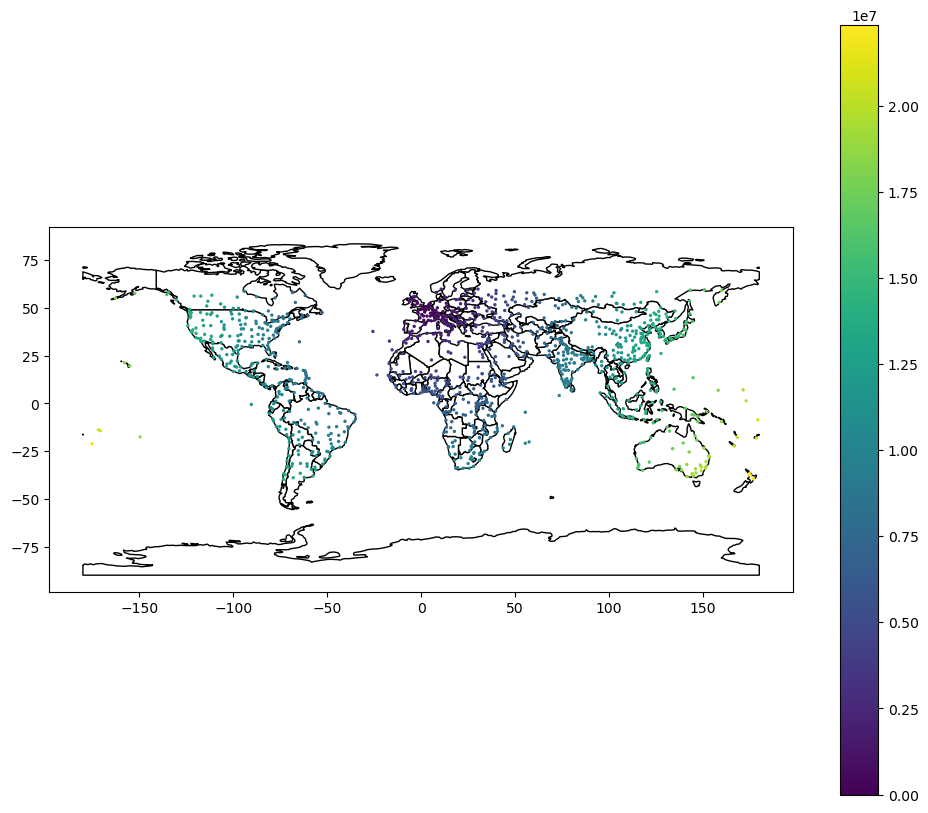

In [ ]:
import pandas as pd
import geopandas as gpd

# Task 1: Read the data from the file
file_name = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(file_name)
# Task 2: Filter the data to include only cities in the northern hemisphere or near equator
northern_cities = df[(df["latitude"] > -40) & (df["latitude"] < 60)]

# Task 3: Create a GeoDataFrame from the filtered data
gdf = gpd.GeoDataFrame(northern_cities, geometry=gpd.points_from_xy(northern_cities["longitude"], northern_cities["latitude"]), crs="EPSG:4326")

# Task 4: Reproject the GeoDataFrame to EPSG:3857
gdf_3857 = gdf.to_crs(epsg=3857)

# Task 5: Calculate the distance of each city to the center of Paris
paris_centroid = gdf_3857.loc[gdf_3857["name"] == "Paris", "geometry"].values[0].centroid
gdf_3857["centroid"] = gdf_3857.centroid
gdf_3857["distance_to_paris"] = gdf_3857["centroid"].distance(paris_centroid)

# Task 6: Plot the cities on a map, color them based on the distance to Paris
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
a= countries.plot(color="white", edgecolor="black", figsize=(12,10))
gdf_4326 = gdf_3857.to_crs(epsg=4326)
gdf_4326.plot(ax=a, column="distance_to_paris", legend=True, cmap="viridis", markersize=2)

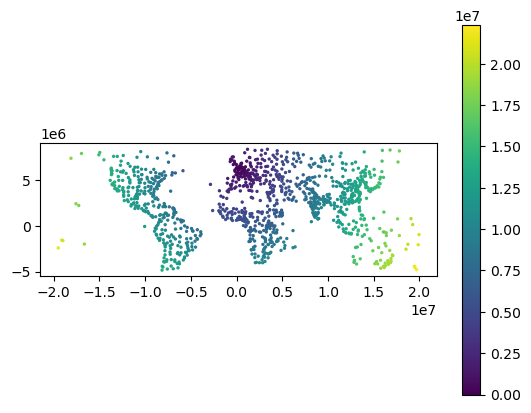

In [53]:
gdf_3857.plot(column="distance_to_paris", legend=True, cmap="viridis", markersize=2)
plt.show()

In [55]:
gdf_3857.explore("distance_to_paris", legend=True)